In [10]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"
import helpers.hp_tuning

%run "$imports_path"

In [3]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [4]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "ctabGAN-qtr"

In [5]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    hp_info = fetch_hp_info(method=METHOD_NAME, version=8)
    curr_image_dir = os.path.join(const.dir.images_hp_v8(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v8(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v8(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/210 [00:00<?, ?it/s]

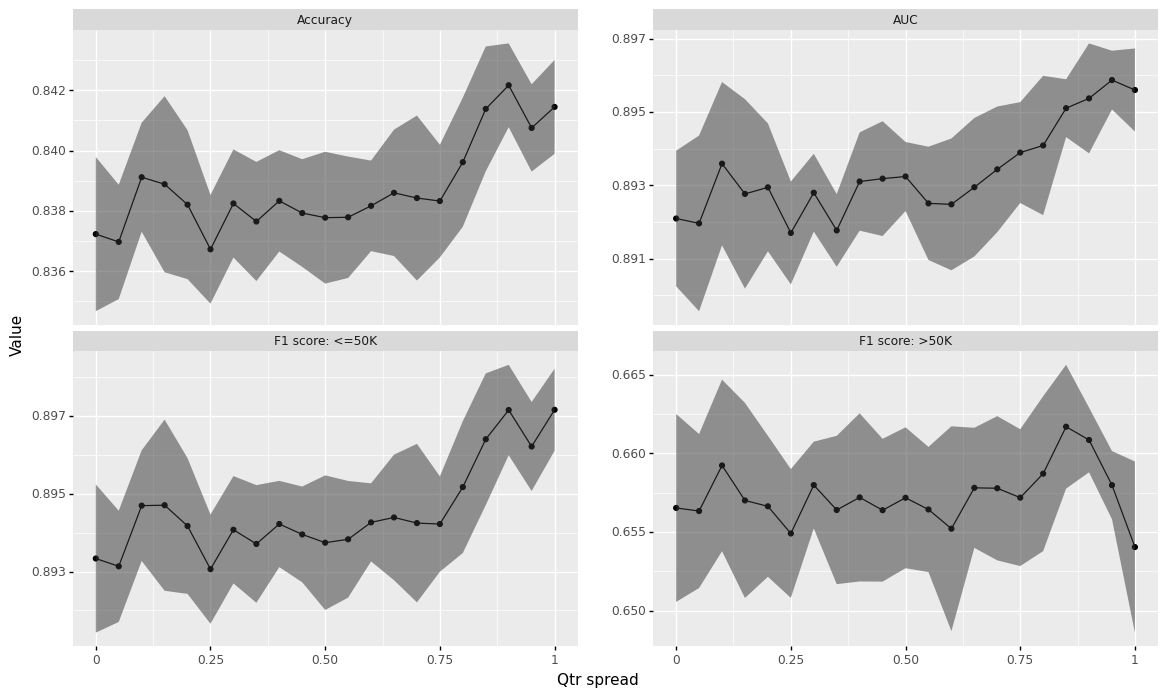

In [30]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [9]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.837231,0.892094,0.774933,0.893334,0.656532,0.002556,0.001848,0.003472,0.001903,0.005979
1,0.05,0.836972,0.891962,0.774734,0.893133,0.656336,0.001896,0.002395,0.002738,0.001428,0.004899
2,0.10,0.839117,0.893589,0.776963,0.894691,0.659235,0.001807,0.002225,0.002867,0.001420,0.005459
3,0.15,0.838884,0.892765,0.775855,0.894702,0.657009,0.002919,0.002583,0.003682,0.002197,0.006206
4,0.20,0.838207,0.892944,0.775402,0.894168,0.656636,0.002469,0.001743,0.003014,0.001742,0.004485
5,0.25,0.836726,0.891701,0.773984,0.893061,0.654908,0.001802,0.001403,0.002327,0.001401,0.004096
6,0.30,0.838247,0.892797,0.776030,0.894072,0.657988,0.001792,0.001061,0.001847,0.001378,0.002759
7,0.35,0.837649,0.891769,0.775055,0.893708,0.656402,0.001975,0.000990,0.002677,0.001510,0.004719
8,0.40,0.838333,0.893102,0.775711,0.894220,0.657203,0.001680,0.001340,0.003000,0.001107,0.005348
9,0.45,0.837928,0.893181,0.775170,0.893952,0.656387,0.001785,0.001565,0.002684,0.001229,0.004544


  0%|          | 0/50 [00:00<?, ?it/s]

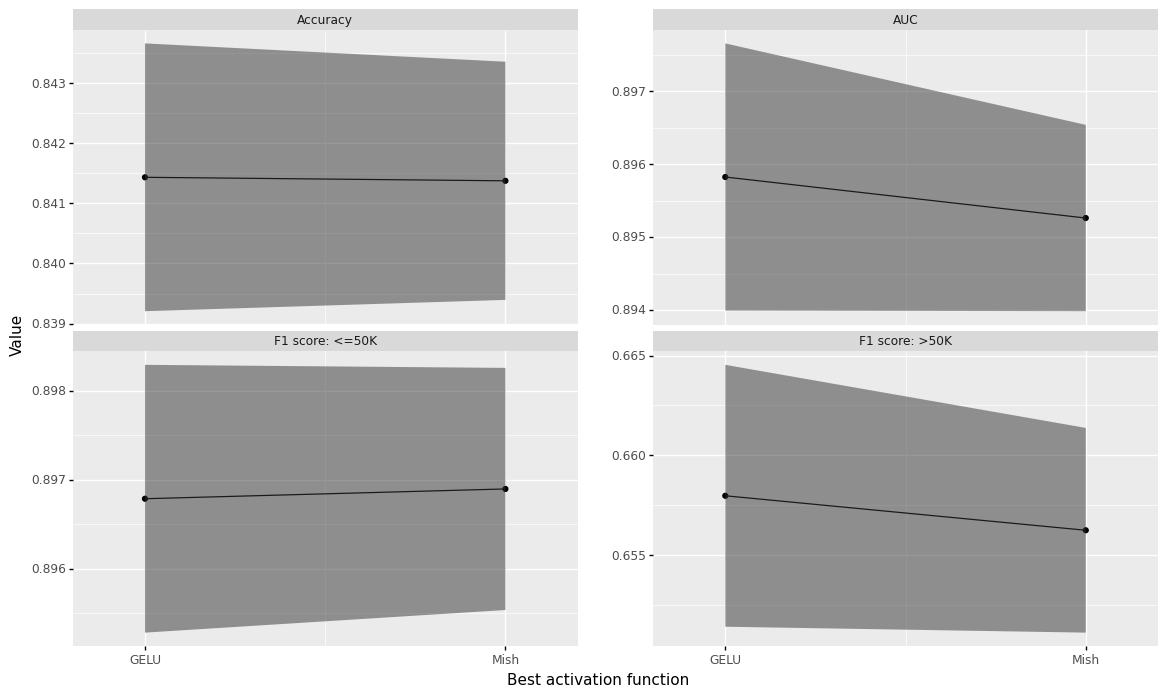

In [17]:
result_best_activation_function = plot_hp_tuning("best_activation_function")

In [19]:
result_best_activation_function

,Best activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,GELU,0.841434,0.895824,0.777382,0.896787,0.657976,0.002229,0.001832,0.003738,0.001501,0.006559
1,Mish,0.841376,0.895261,0.776573,0.896896,0.656249,0.001982,0.001278,0.003020,0.001358,0.005128


  0%|          | 0/50 [00:00<?, ?it/s]

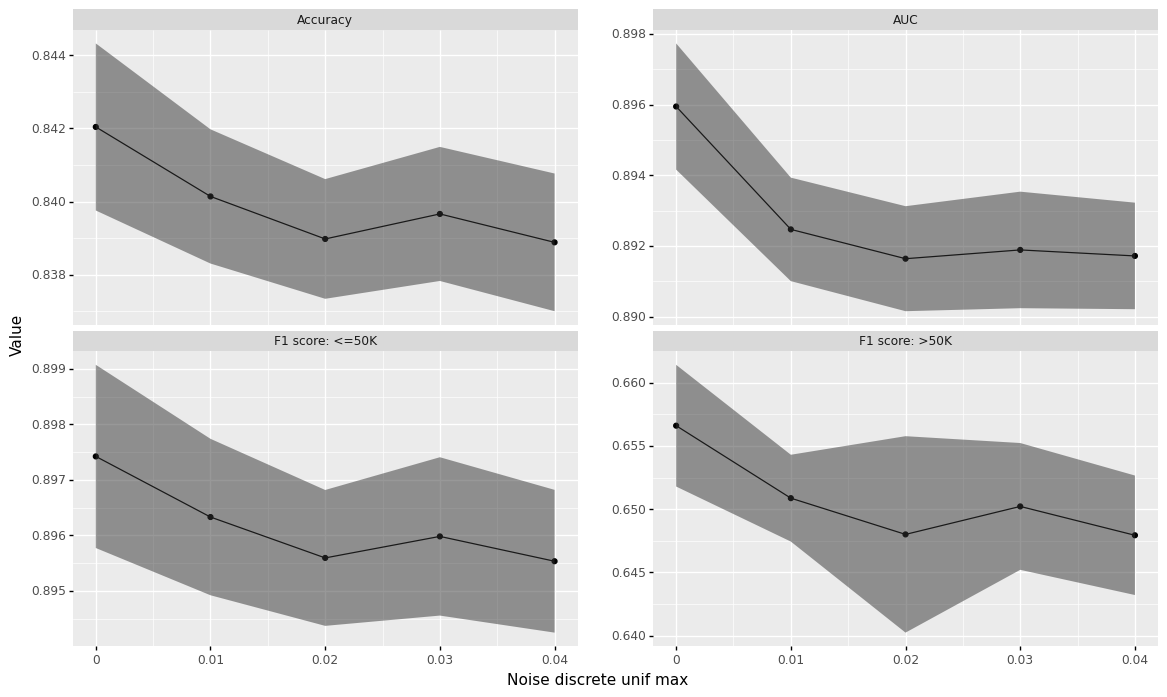

In [31]:
result_noise_discrete_unif_max = plot_hp_tuning("noise_discrete_unif_max")

  0%|          | 0/240 [00:00<?, ?it/s]

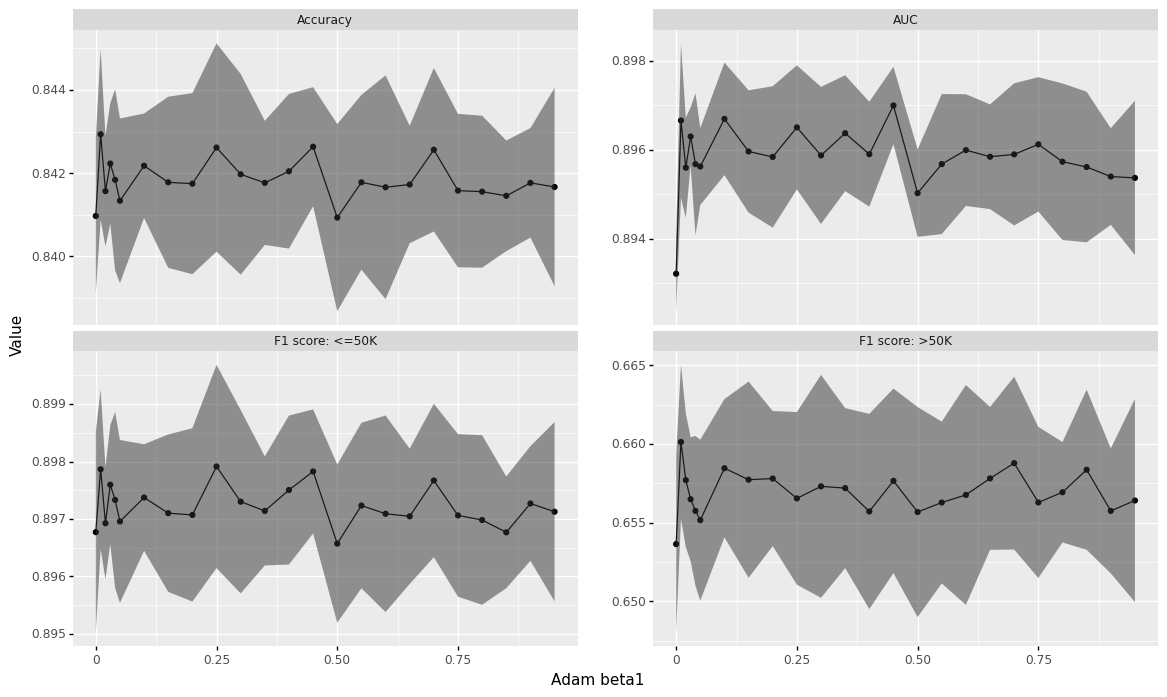

In [39]:
result_adam_beta1 = plot_hp_tuning("adam_beta1")

In [ ]:
result_adam_beta1

  0%|          | 0/200 [00:00<?, ?it/s]

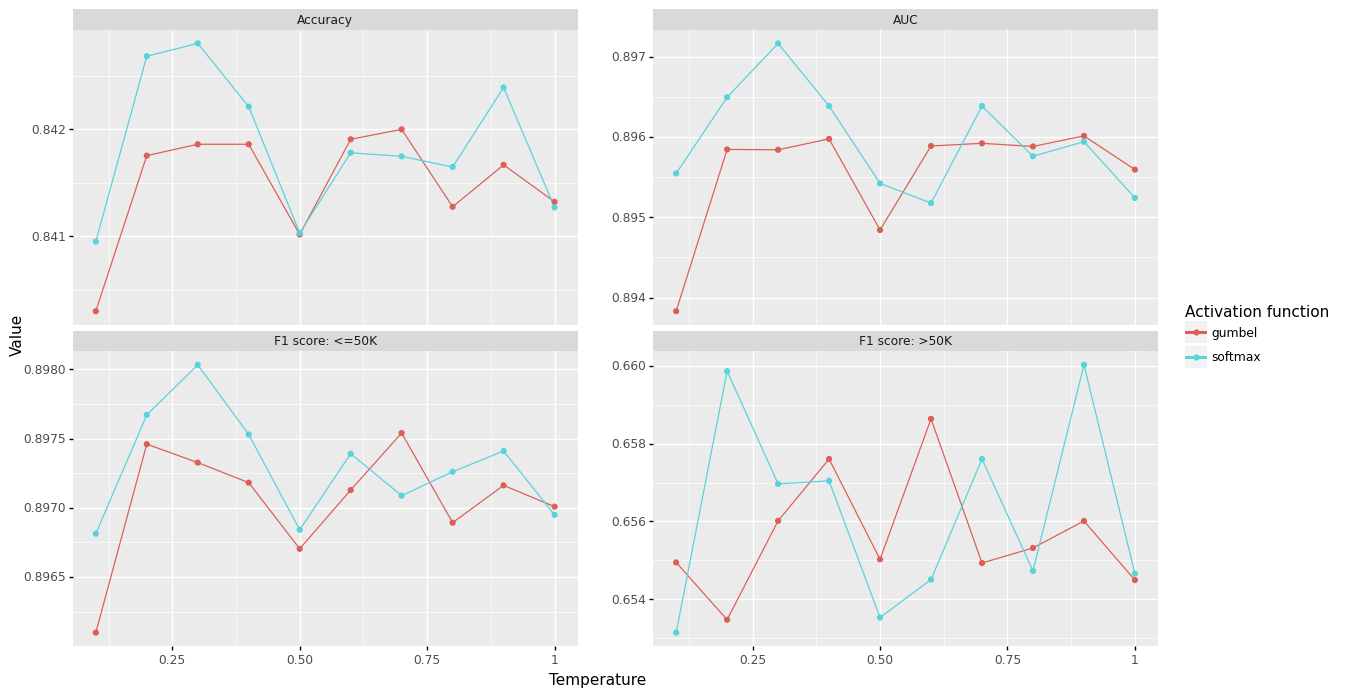

In [34]:
result_oh_encoding = plot_hp_tuning("oh_encoding")

In [35]:
result_oh_encoding

,Temperature,Activation function,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.1,gumbel,0.840299,0.893830,0.775523,0.896099,0.654947,0.002081,0.001178,0.003552,0.001439,0.006387
1,0.1,softmax,0.840950,0.895547,0.774979,0.896814,0.653143,0.002166,0.001417,0.003217,0.001489,0.005410
2,0.2,gumbel,0.841753,0.895846,0.775467,0.897460,0.653475,0.001648,0.001267,0.002476,0.001200,0.004396
3,0.2,softmax,0.842683,0.896495,0.778766,0.897670,0.659861,0.002587,0.001973,0.004175,0.001769,0.007281
4,0.3,gumbel,0.841859,0.895841,0.776671,0.897326,0.656015,0.001807,0.001225,0.003459,0.001044,0.006017
5,0.3,softmax,0.842802,0.897167,0.777499,0.898032,0.656966,0.001529,0.001051,0.001825,0.001289,0.003561
6,0.4,gumbel,0.841859,0.895977,0.777393,0.897182,0.657605,0.001578,0.001288,0.002085,0.001225,0.003743
7,0.4,softmax,0.842211,0.896386,0.777286,0.897529,0.657043,0.001237,0.000957,0.002453,0.000876,0.004649
8,0.5,gumbel,0.841016,0.894842,0.775865,0.896704,0.655025,0.002383,0.001621,0.003624,0.001544,0.005891
9,0.5,softmax,0.841029,0.895422,0.775186,0.896842,0.653531,0.002094,0.002172,0.004325,0.001295,0.007890


  0%|          | 0/75 [00:00<?, ?it/s]

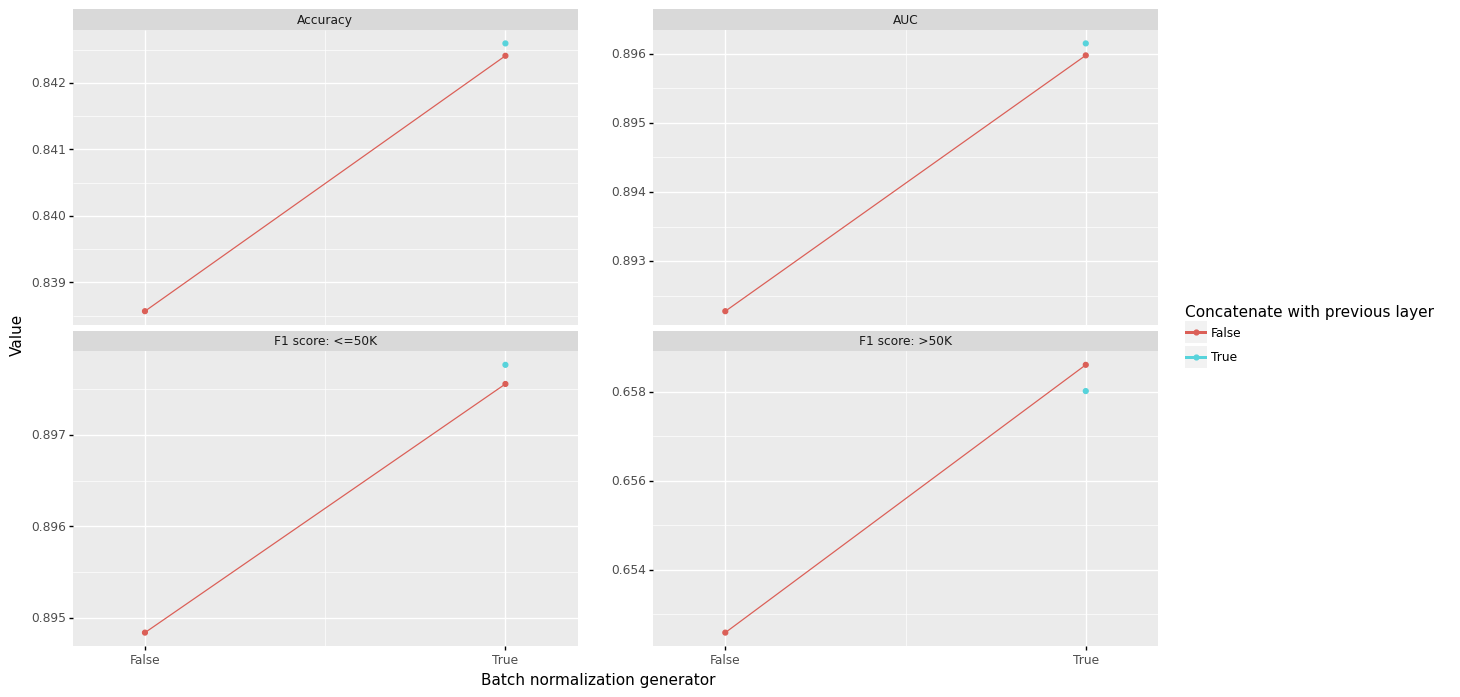

In [66]:
result_BN = plot_hp_tuning("BN", n_synthetic_datasets=25)

In [37]:
result_BN

,Batch normalization generator,Concatenate with previous layer,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,False,False,0.838745,0.892077,0.773739,0.895011,0.652468,0.001572,0.001353,0.002721,0.001119,0.004990
1,True,False,0.842271,0.896247,0.778148,0.897417,0.658879,0.002051,0.001825,0.002804,0.001434,0.004551
2,True,True,0.842643,0.895979,0.778428,0.897706,0.659149,0.002358,0.001651,0.003612,0.001563,0.006000


  0%|          | 0/60 [00:00<?, ?it/s]

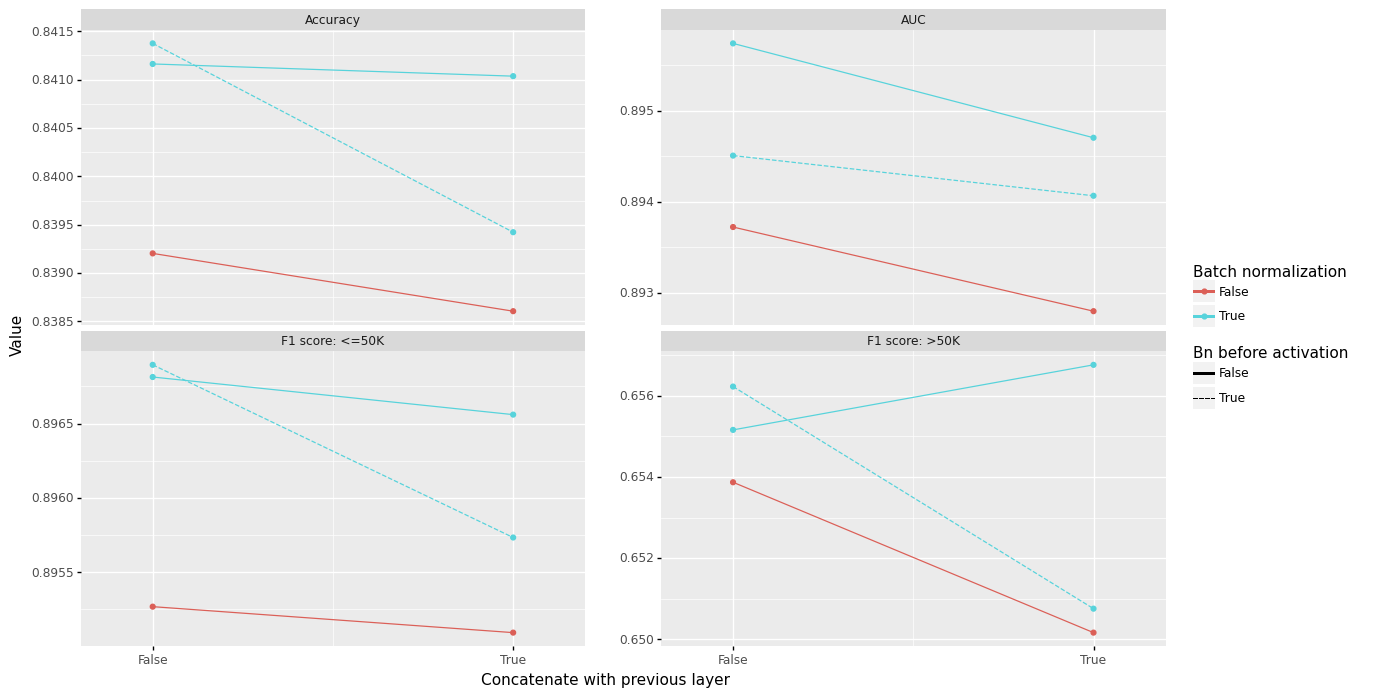

In [42]:
result_BN_advanced = plot_hp_tuning("BN_advanced")

In [ ]:
result_BN_advanced

  0%|          | 0/125 [00:00<?, ?it/s]

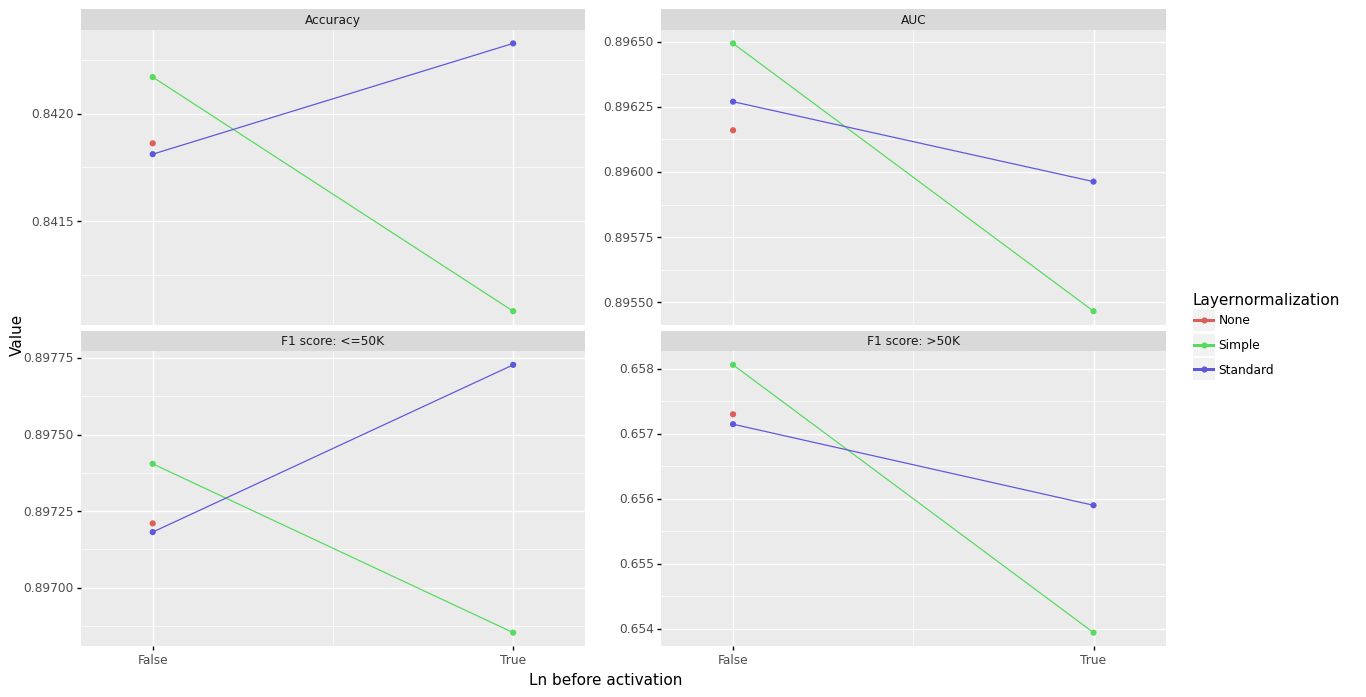

In [69]:
result_LN_advanced = plot_hp_tuning("LN_advanced")

  0%|          | 0/70 [00:00<?, ?it/s]

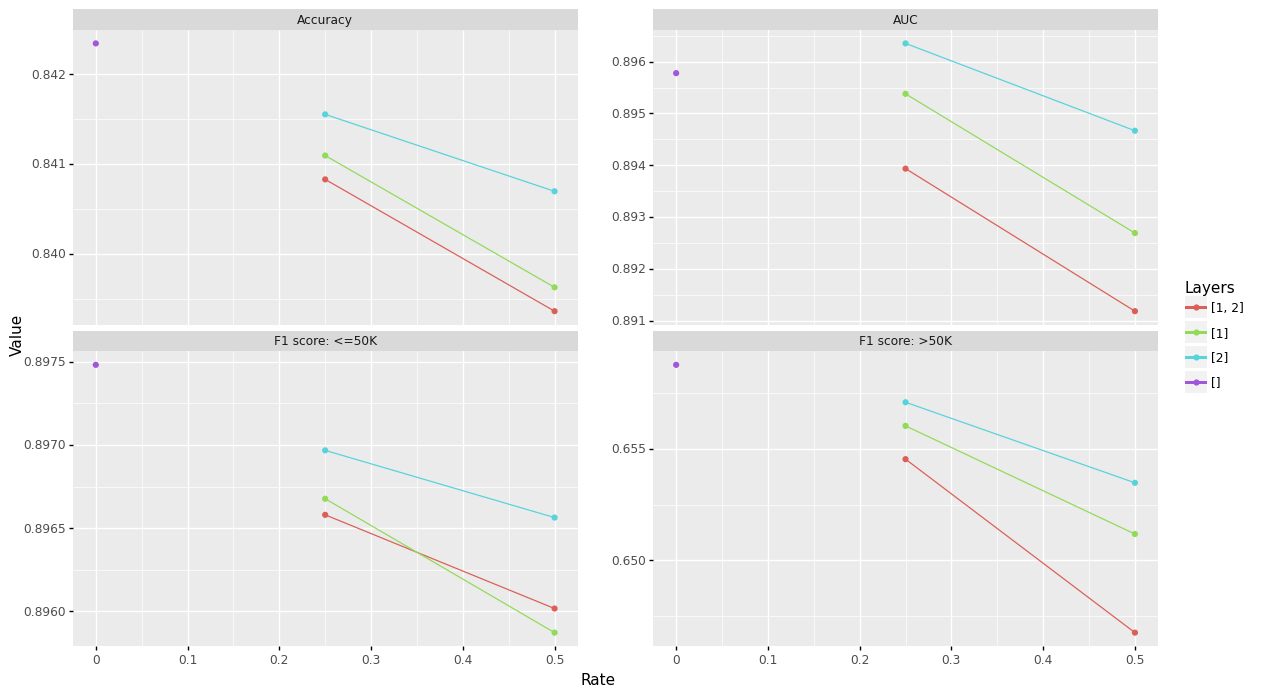

In [70]:
result_dropout_critic = plot_hp_tuning("critic_dropout")

  0%|          | 0/40 [00:00<?, ?it/s]

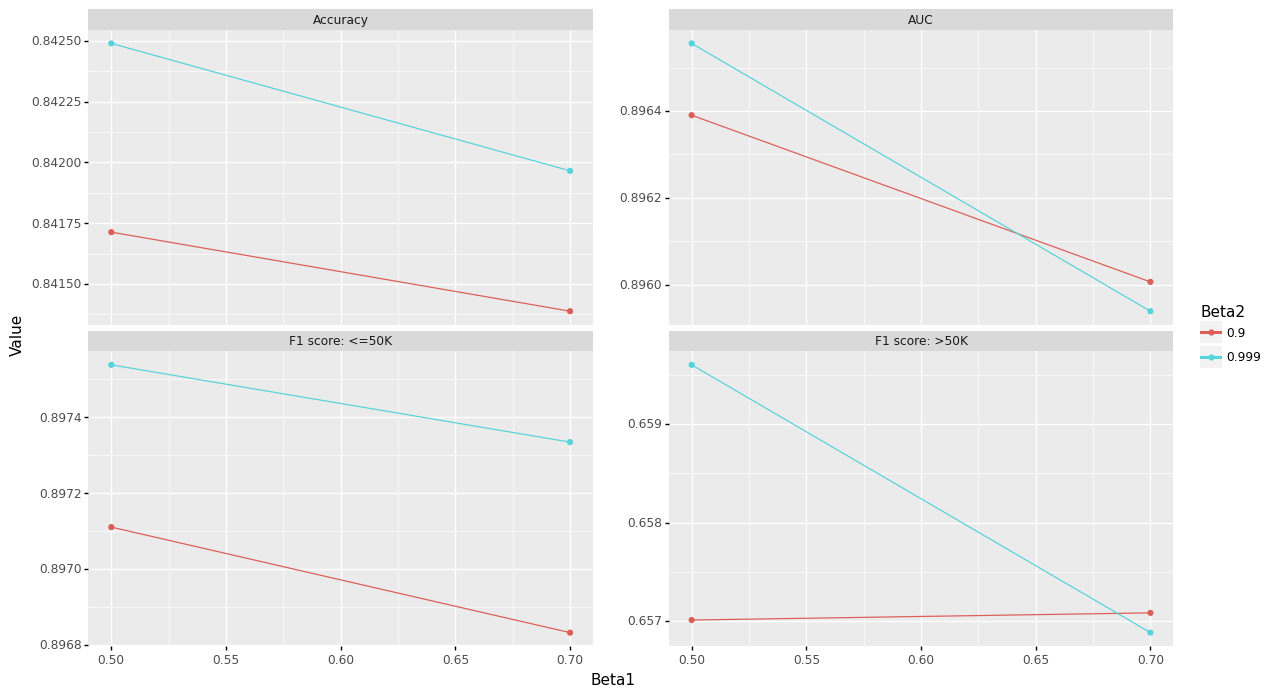

In [72]:
result_adam_betas = plot_hp_tuning("adam_betas")

In [29]:
import pandas as pd
df = pd.read_csv(os.path.join(const.dir.data_comparison(), "creditcard_edited.csv"))

In [30]:
df.select_dtypes(exclude=[np.number]).columns.values

array(['Class'], dtype=object)

In [31]:
df.select_dtypes(include=[np.number]).columns.values

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount'], dtype=object)

In [32]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,Class0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,Class0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,Class0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,Class0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,Class0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,Class0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,Class0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,Class0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,Class0


In [46]:
import pandas as pd
df = pd.read_csv(os.path.join(const.dir.data_comparison(), "covtype_edited.csv"))

In [47]:
train_indices = np.load(os.path.join(const.dir.data_comparison(), "indices", "covtype_edited", "bool_indices_14.npy"))

In [48]:
df

,Wilderness_Area,Soil_Type,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,Wilderness_Area1,Soil_Type29,2596,51,3,258,0,510,221,232,148,6279,CoverType5
1,Wilderness_Area1,Soil_Type29,2590,56,2,212,-6,390,220,235,151,6225,CoverType5
2,Wilderness_Area1,Soil_Type12,2804,139,9,268,65,3180,234,238,135,6121,CoverType2
3,Wilderness_Area1,Soil_Type30,2785,155,18,242,118,3090,238,238,122,6211,CoverType2
4,Wilderness_Area1,Soil_Type29,2595,45,2,153,-1,391,220,234,150,6172,CoverType5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,Wilderness_Area3,Soil_Type2,2396,153,20,85,17,108,240,237,118,837,CoverType3
581008,Wilderness_Area3,Soil_Type2,2391,152,19,67,12,95,240,237,119,845,CoverType3
581009,Wilderness_Area3,Soil_Type2,2386,159,17,60,7,90,236,241,130,854,CoverType3
581010,Wilderness_Area3,Soil_Type2,2384,170,15,60,5,90,230,245,143,864,CoverType3


In [63]:
np.sort(df.loc[train_indices, "Soil_Type"].unique())

array(['Soil_Type1', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type2',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type3', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type4', 'Soil_Type40', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9'],
      dtype=object)

In [64]:
np.sort(df.loc[~train_indices, "Soil_Type"].unique())

array(['Soil_Type1', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type16', 'Soil_Type17',
       'Soil_Type18', 'Soil_Type19', 'Soil_Type2', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type3', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type4', 'Soil_Type40', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9'], dtype=object)